# Question

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

# Steps

* EDA

* Correlation Analysis

* Model Building

* Model Testing

* Model Validation Two Techniques: 1. Collinearity Check & 2. Residual Analysis.

* Model Deletion Diagnostics (checking Outliers or Influencers) Two Techniques : 1. Cook's Distance & 2. Leverage value

* Improving the Model

* Model Deletion Diagnostics and Final Model

* Model Predictions

* table containing R^2 value for each prepared model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [2]:
# Read the data
startups = pd .read_csv(r"C:\Users\ROHINI\Desktop\50_Startups.csv")

In [3]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [4]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


 ### check the missing values

In [5]:
startups.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
data=startups.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
data

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


 ### Find Duplicate values

In [7]:
data[data.duplicated()]

,RDS,ADMS,MKTS,State,Profit


In [8]:
data.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Correlation Analysis

In [9]:
data.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


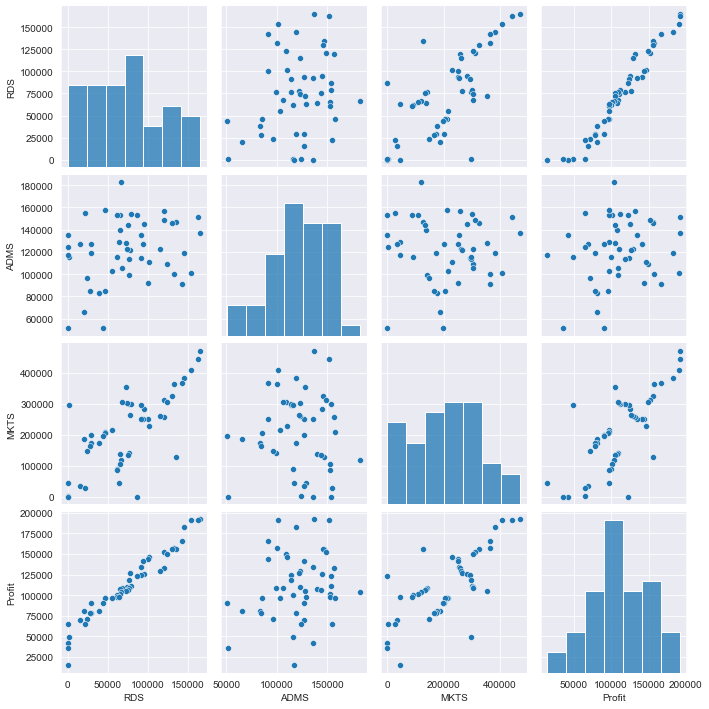

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

## Model Building

In [11]:
model = smf.ols("Profit~RDS+ADMS+MKTS", data=data).fit()

In [12]:
model

## Model Testing

### finding coefficient parameter

In [13]:
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

### Find tvalues & pvalues

In [14]:
model.tvalues, np.round(model.pvalues,5)

(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MKTS          1.655077
 dtype: float64,
 Intercept    0.00000
 RDS          0.00000
 ADMS         0.60176
 MKTS         0.10472
 dtype: float64)

### Finding rsquared values

In [15]:
model.rsquared , model.rsquared_adj 

(0.9507459940683246, 0.9475337762901719)

##### Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'
##### Also find their tvalues and pvalues

In [16]:
slr_a=smf.ols("Profit~ADMS",data=data).fit()
slr_a.tvalues , slr_a.pvalues  

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

In [17]:
slr_m=smf.ols("Profit~MKTS",data=data).fit()
slr_m.tvalues , slr_m.pvalues  

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [18]:
mlr_am=smf.ols("Profit~ADMS+MKTS",data=data).fit()
mlr_am.tvalues , mlr_am.pvalues  

(Intercept    1.142741
 ADMS         2.467779
 MKTS         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMS         1.729198e-02
 MKTS         9.727245e-11
 dtype: float64)

# Model Validation 

## *  Collinearity Check

### Collinearity Problem Check
### Calculate VIF = 1/(1-Rsquare) for all independent variables

In [19]:
rsq_r=smf.ols("RDS~ADMS+MKTS",data=data).fit().rsquared
vif_r=1/(1-rsq_r)
vif_r

2.4689030699947017

In [20]:
rsq_a=smf.ols("ADMS~RDS+MKTS",data=data).fit().rsquared
vif_a=1/(1-rsq_a)
vif_a

1.1750910070550453

In [21]:
rsq_m=smf.ols("MKTS~RDS+ADMS",data=data).fit().rsquared
vif_m=1/(1-rsq_m)
vif_m

2.3267732905308773

### Putting the values in Dataframe format

In [22]:
data1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(data1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


 ## * Residual Analysis

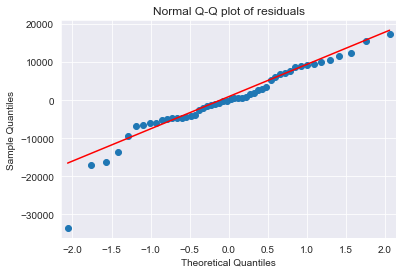

In [23]:
import statsmodels.api as sm
model=smf.ols("Profit~RDS+ADMS+MKTS",data=data).fit()
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [24]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

# Residual Plot for Homoscedasticity

In [25]:
model=smf.ols("Profit~RDS+ADMS+MKTS",data=data).fit()

In [26]:
model

In [27]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

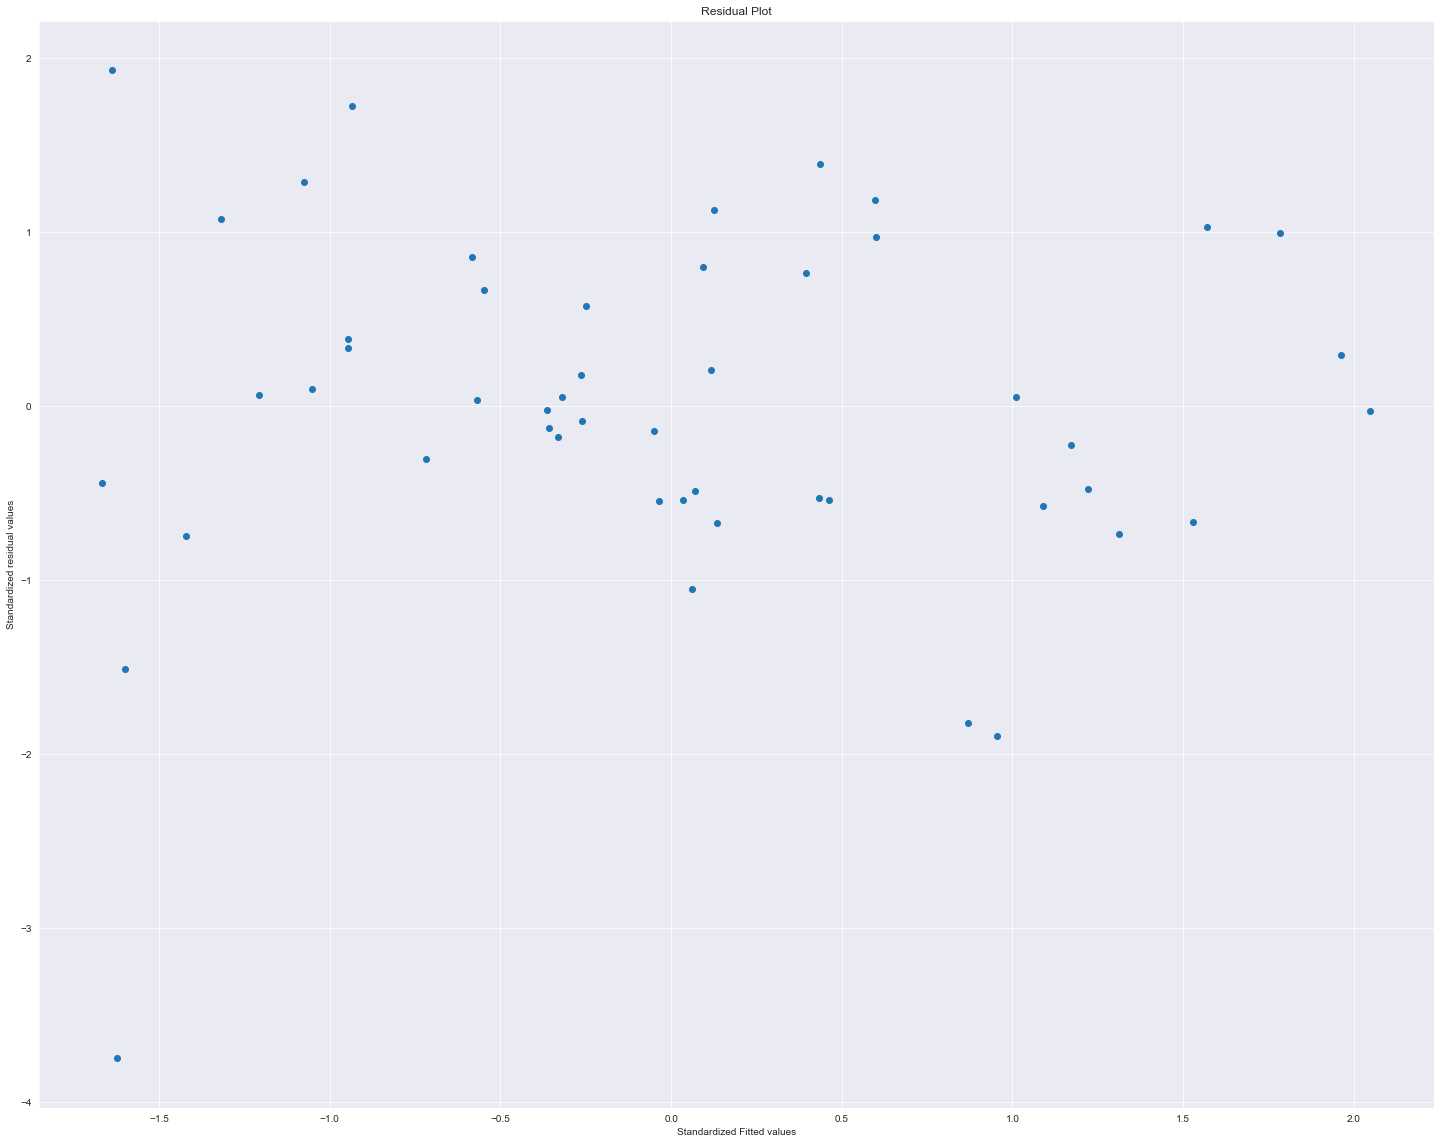

In [28]:
plt.figure(figsize=(25,20))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressor

eval_env: 1


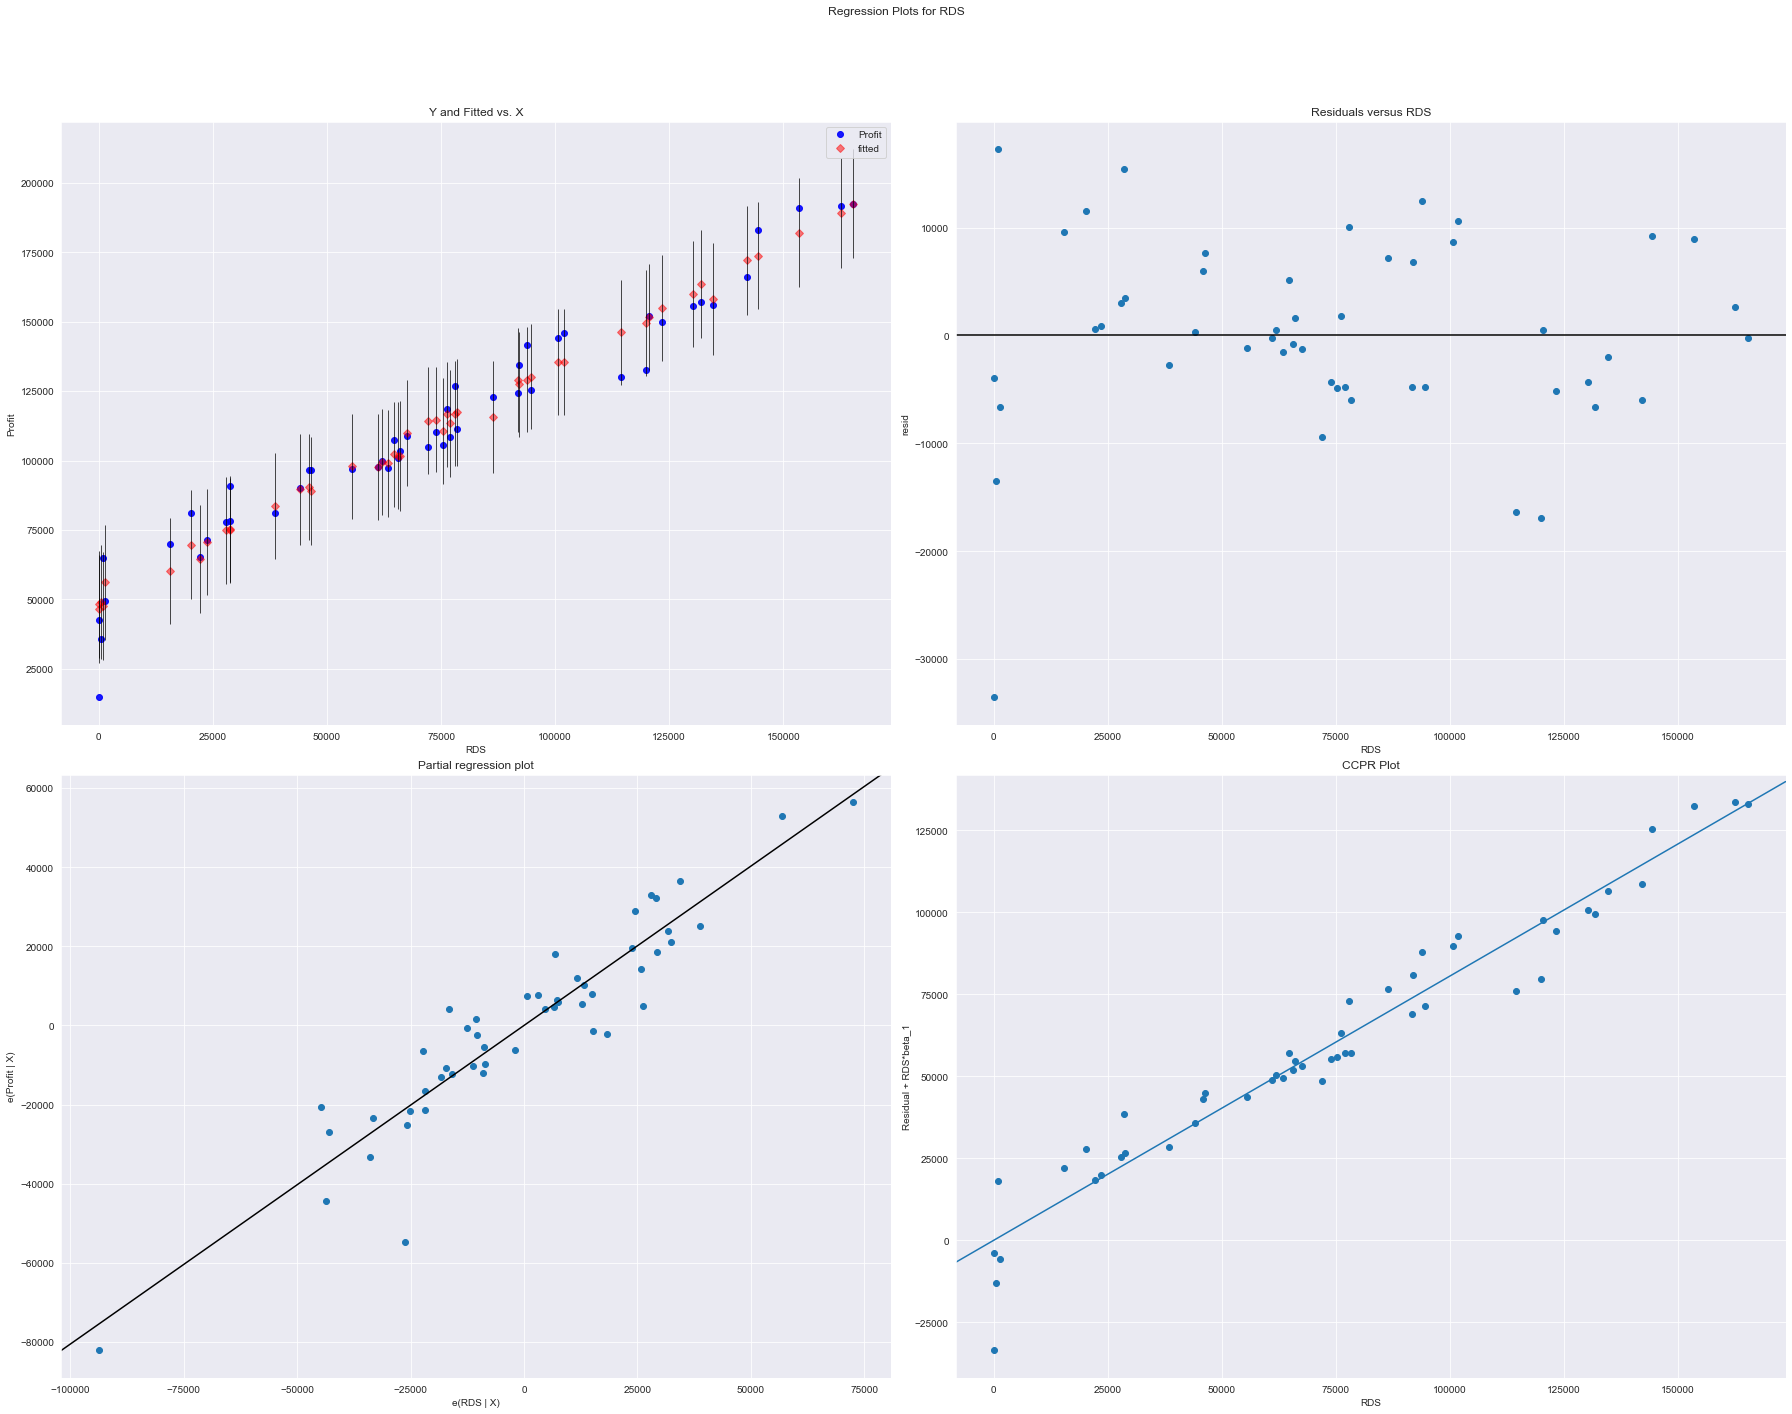

In [29]:
fig = plt.figure(figsize=(25,20))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

eval_env: 1


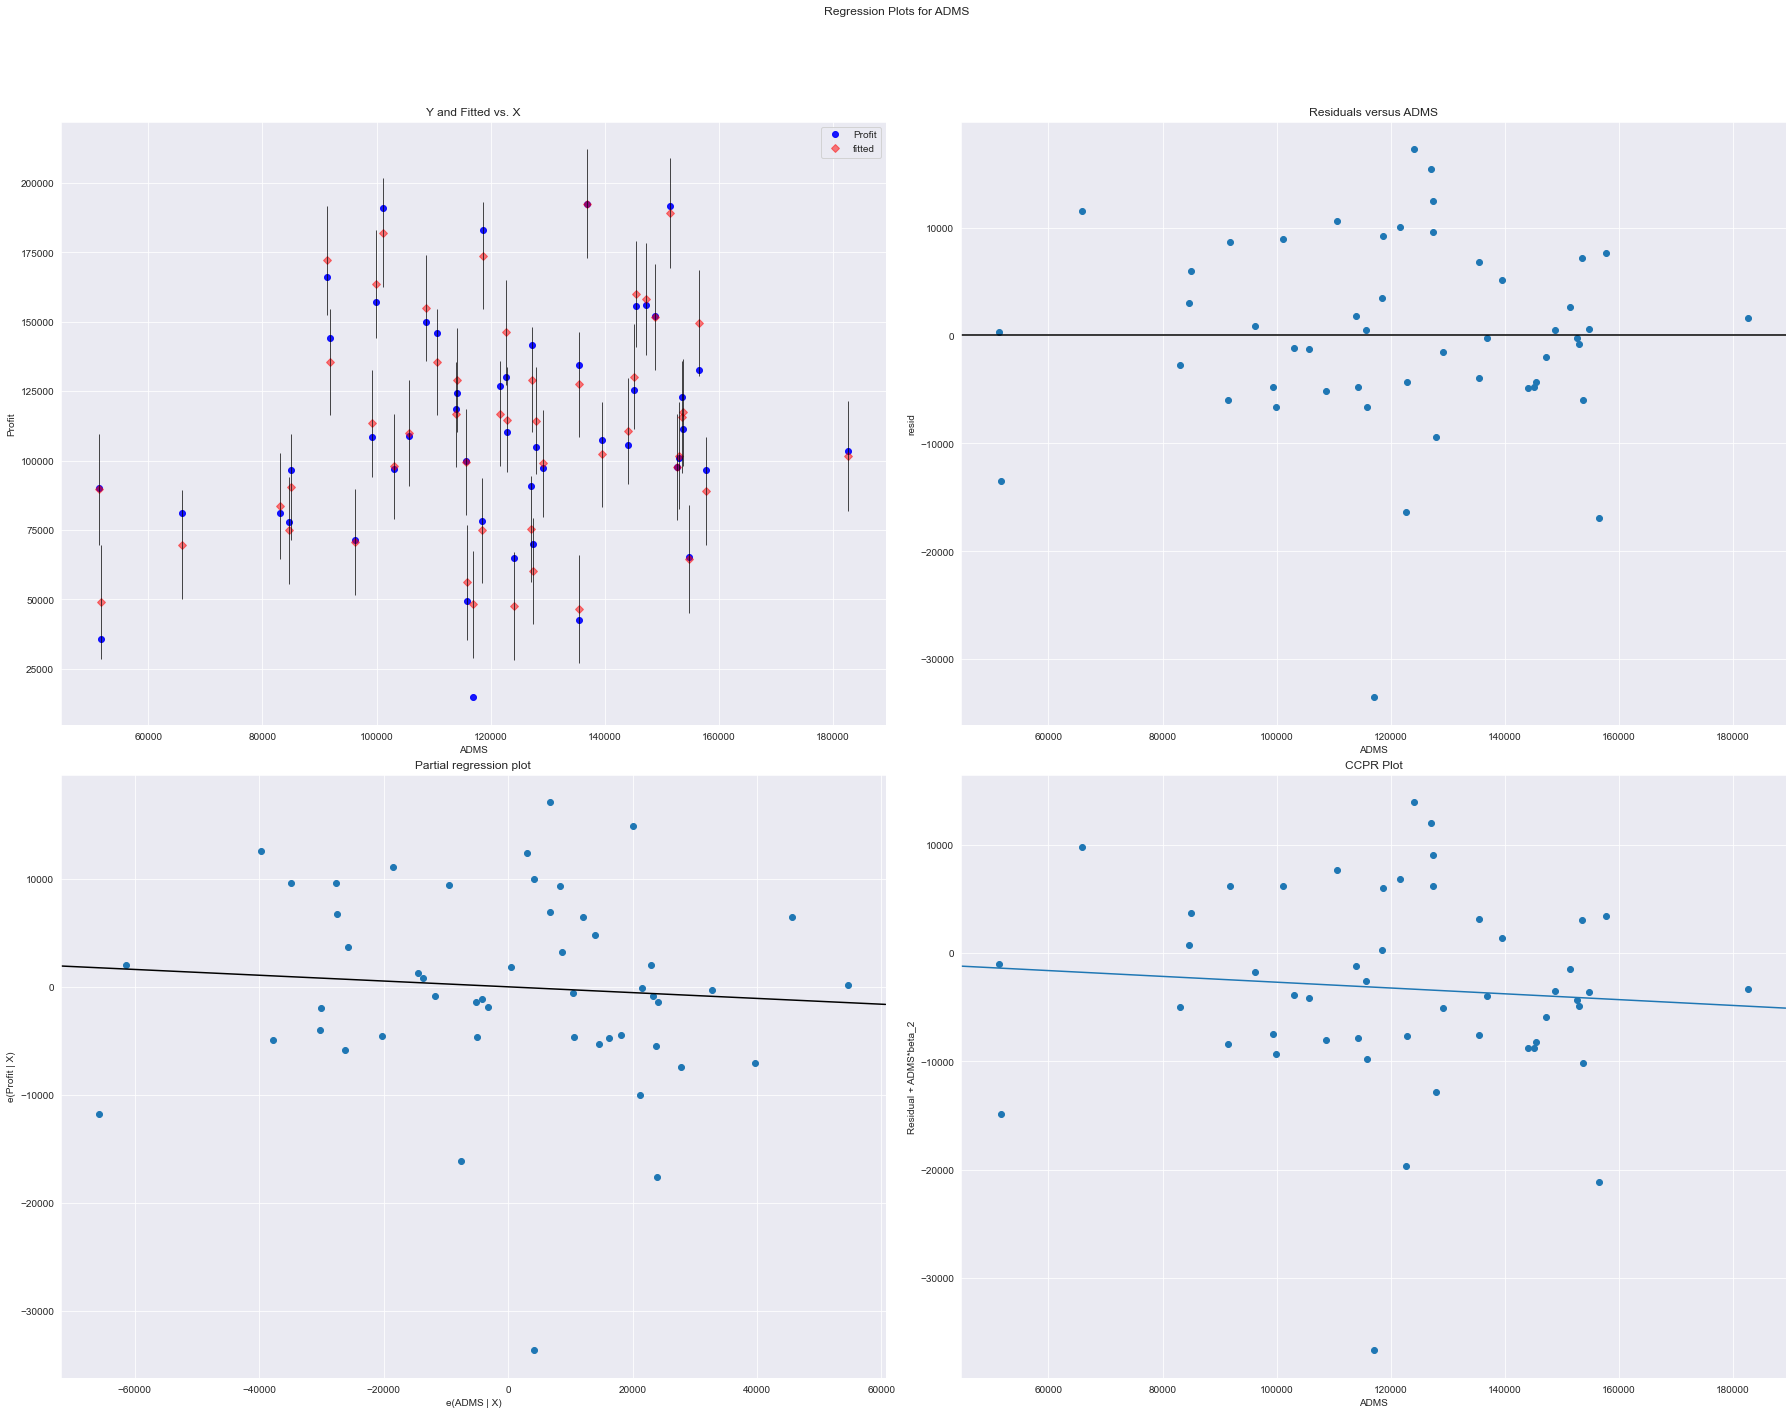

In [30]:
fig = plt.figure(figsize=(25,20))
fig = sm.graphics.plot_regress_exog(model, "ADMS", fig=fig)
plt.show()

eval_env: 1


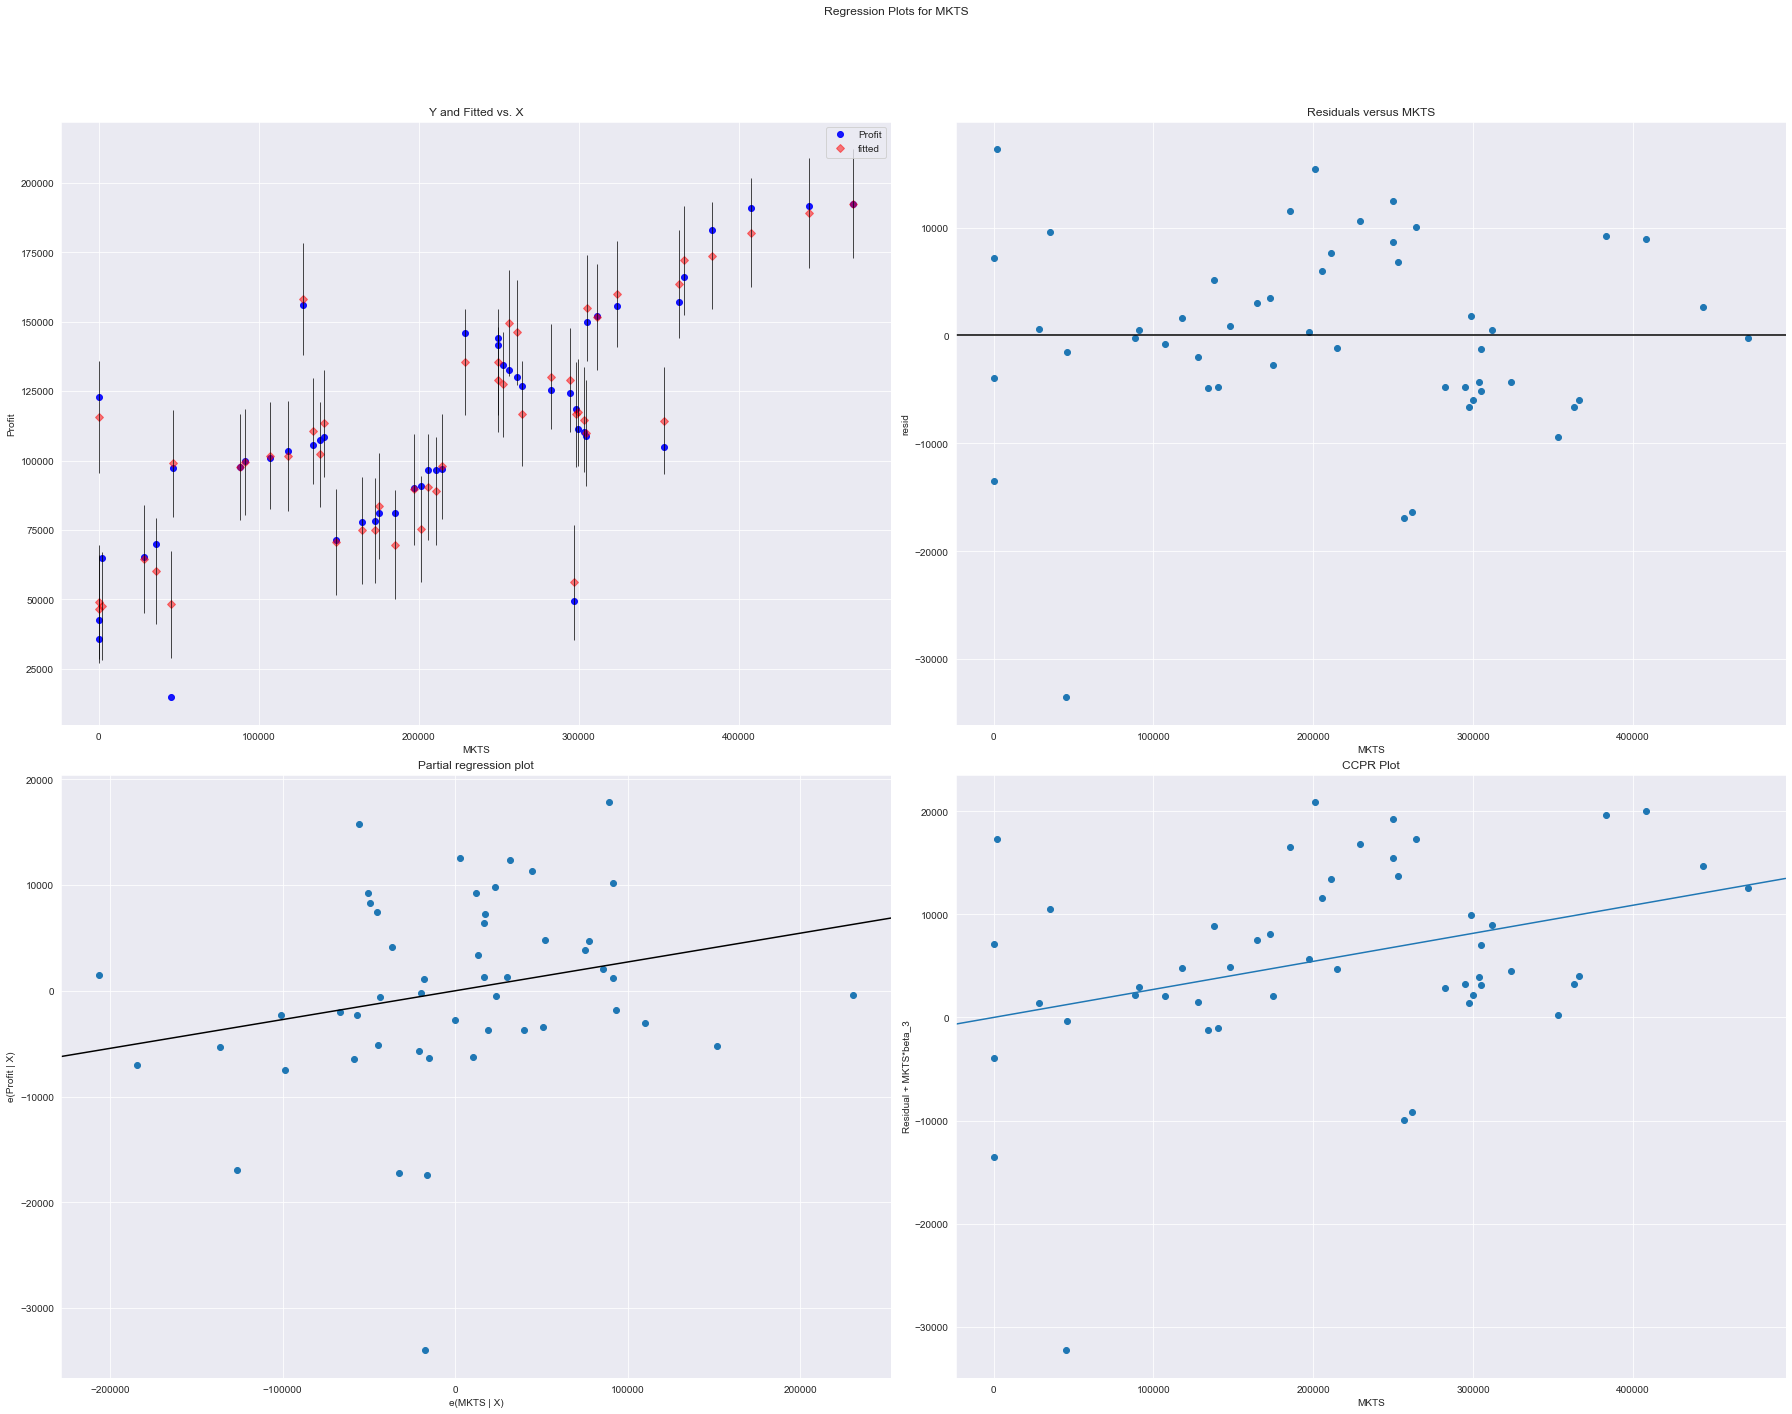

In [31]:
fig = plt.figure(figsize=(25,20))
fig = sm.graphics.plot_regress_exog(model, "MKTS", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Outliers

### Cook's Distance

In [32]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [33]:
model_influence

#### Plot the Influencers values using stem plot

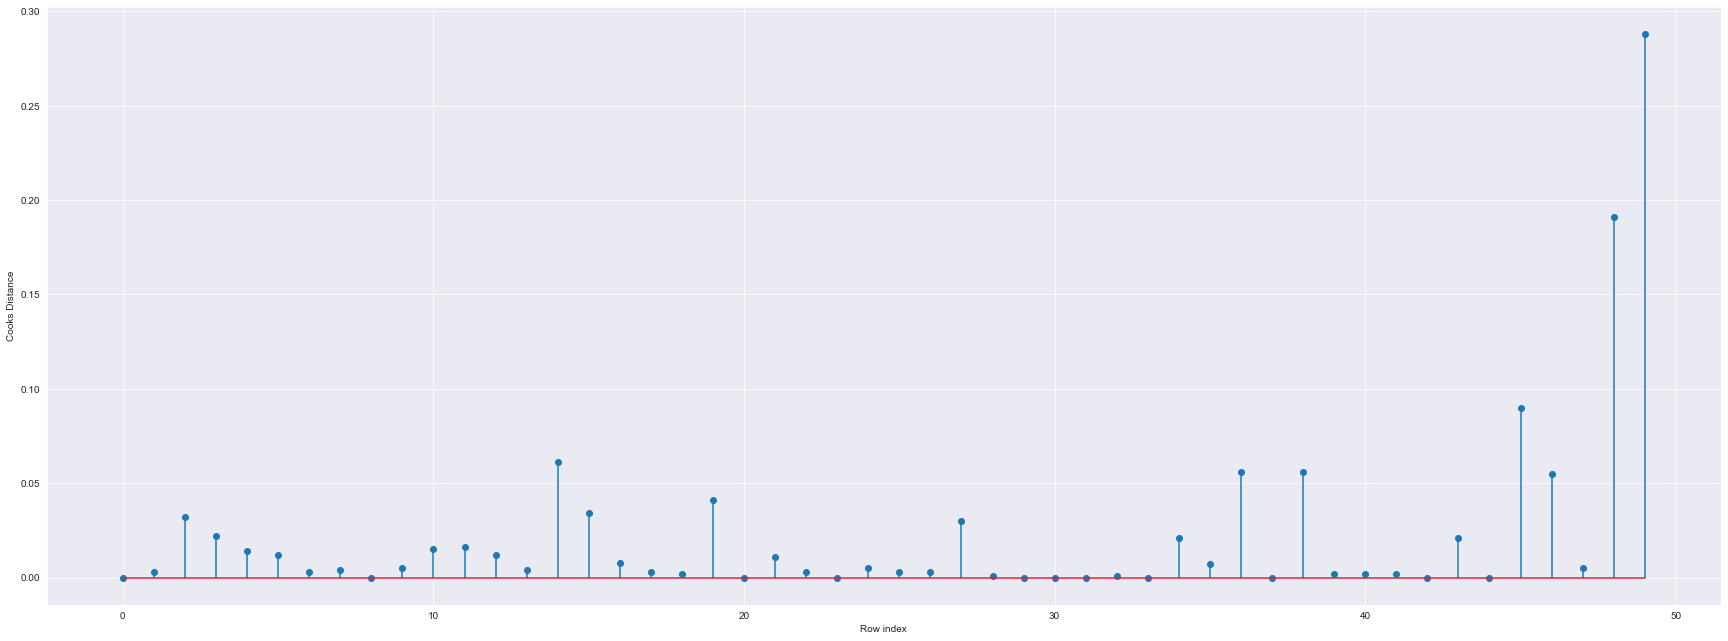

In [34]:
fig = plt.subplots(figsize=(30,11))
plt.stem(np.arange(len(startups)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

#### index and value of influencer where c is more than .5


In [35]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

In [36]:
dir(plt.stem)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

## High Influence Points

In [37]:
startups.shape

(50, 5)

In [38]:
k = startups.shape[1]
n = startups.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

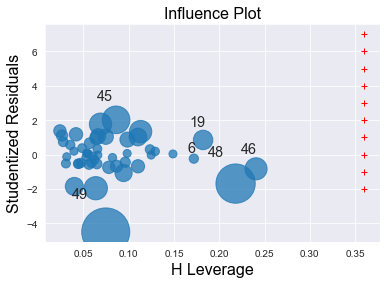

In [39]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alhpa=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

## From the above plot, it is evident that data point 49 are the Influencer

In [40]:
data[data.index.isin([49])] 

,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving The Model

### Discard the data points which are influencers and reasign the row number (reset_index())


In [41]:
data2=data.drop(startups.index[[49]],axis=0).reset_index(drop=True)

In [42]:
data2

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Deletion Diagnostics and Final model

In [43]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data_=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data_
else:
    final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)


Thus model accuracy is improved to 0.9613162435129847


In [44]:
final_model.rsquared

0.9613162435129847

In [45]:
data

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# model Predictions

###  prediction for new data


In [46]:
startups2=pd.DataFrame({'RDS':70000,"ADMS":90000,"MKTS":140000},index=[0])
startups2

,RDS,ADMS,MKTS
0,70000,90000,140000


### Manual Prediction of Price


In [47]:
final_model.predict(startups2)

0    108727.154753
dtype: float64

### Automatic Prediction of Price 


In [48]:
pred_y=final_model.predict(data)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
49     50925.119153


#  * Table containing R^2 value for each prepared model

In [49]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316


# Multilinear Regression   ## Toyota

## Import libraries

In [50]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot


#### Read csv file

In [51]:
toyota=pd.read_csv(r"C:\Users\ROHINI\Downloads\ToyotaCorolla.csv",encoding='latin1')

In [52]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# EDA 

In [53]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [54]:
toyota.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
toyota_1=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)
toyota_1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [56]:
toyota_2=toyota_1.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyota_2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [57]:
toyota_2[toyota_2.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [58]:
toyota_3=toyota_2.drop_duplicates().reset_index(drop=True)
toyota_3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [59]:
toyota.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlation Analysis

In [60]:
toyota_3.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


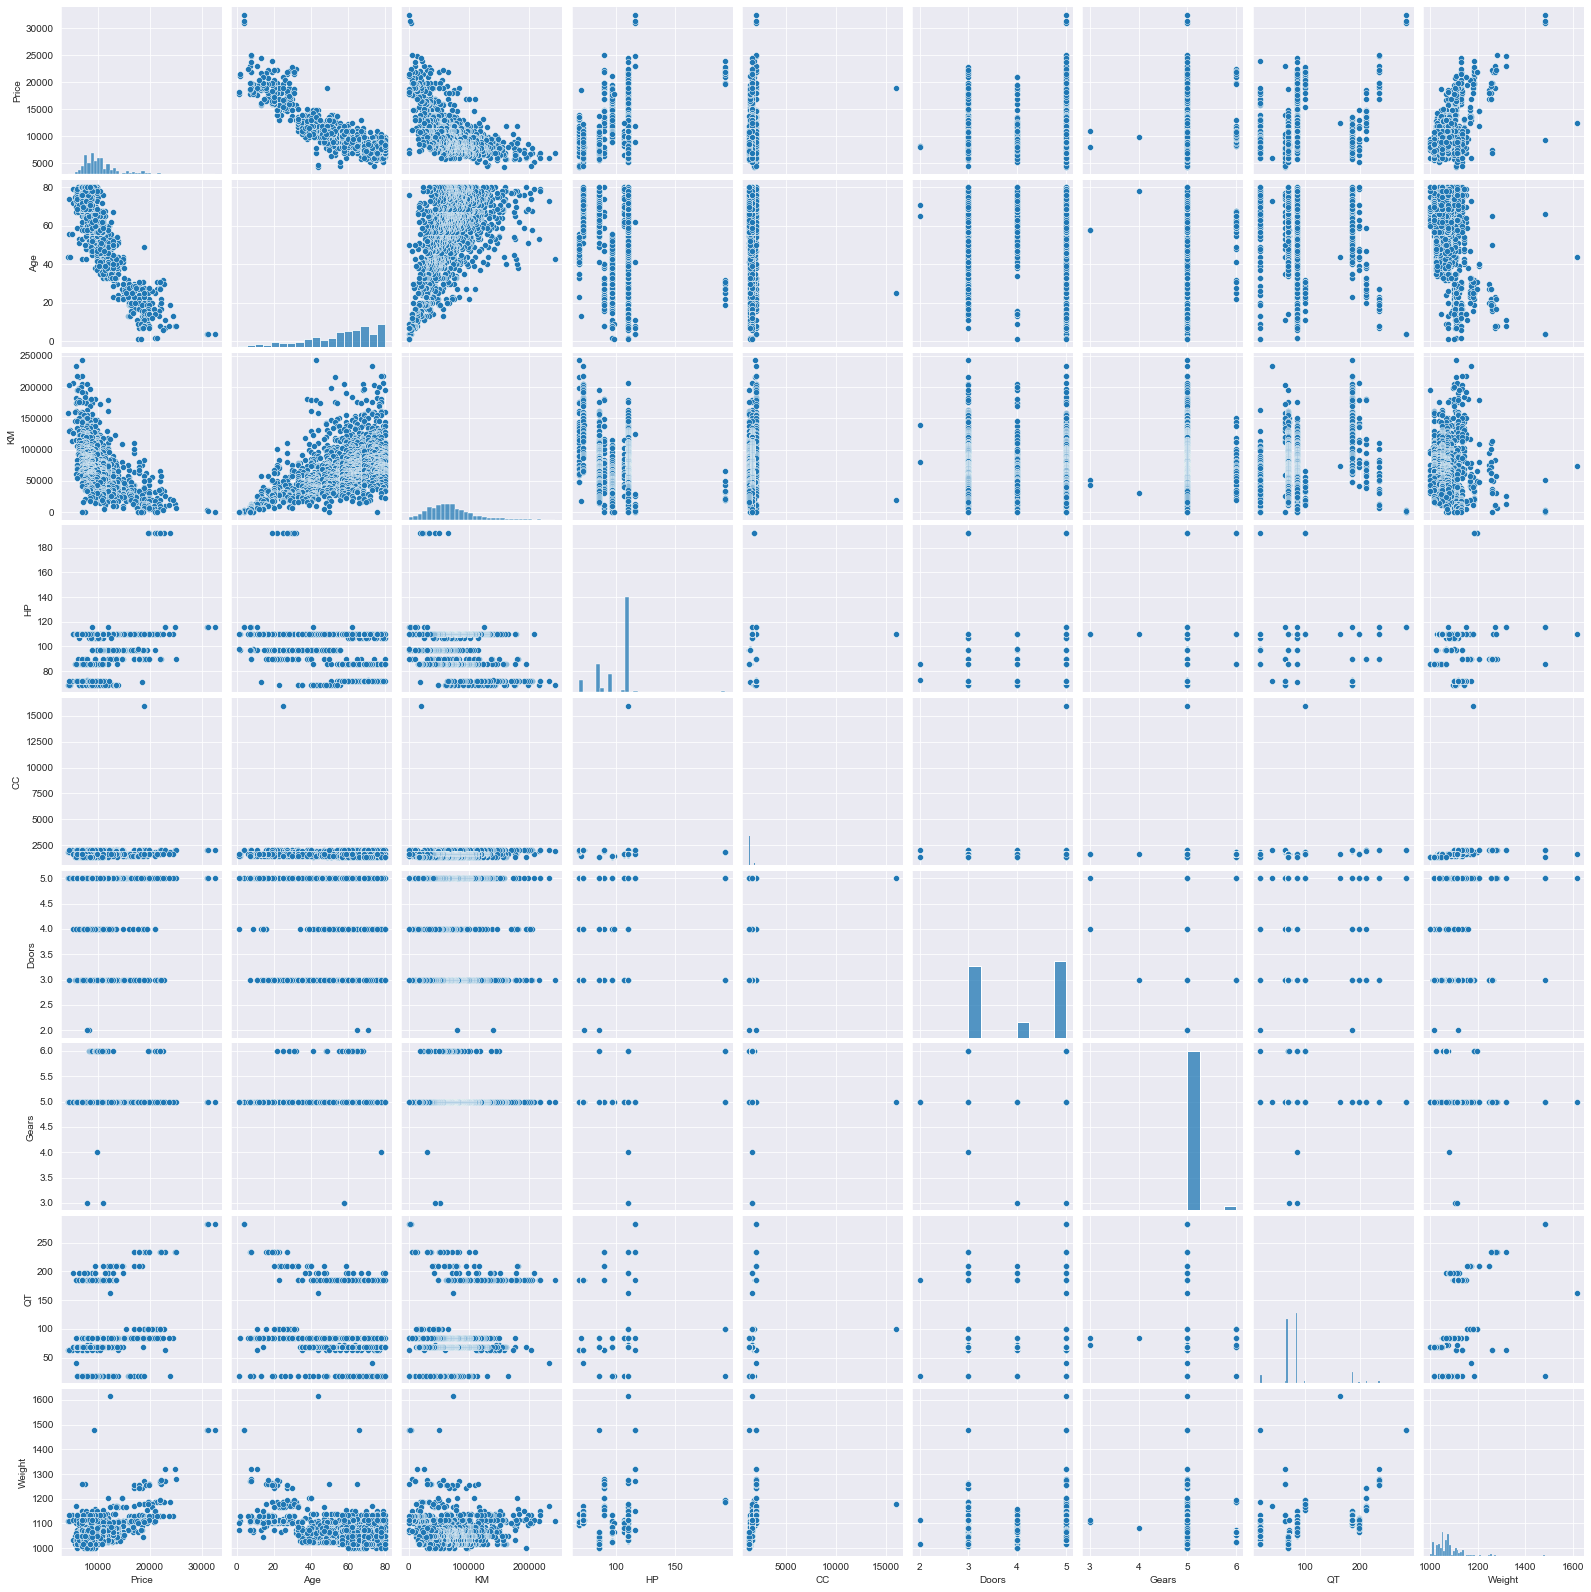

In [61]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota_3)

# Model Building

In [62]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_3).fit()

In [63]:
model

# Model Testing

### Finding Coefficient parameter


In [64]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

### Finding tvalues and pvalues

In [65]:
model.tvalues , np.round(model.pvalues,5)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept    0.00011
 Age          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 Weight       0.00000
 dtype: float64)

### Finding rsquared values

In [66]:
model.rsquared , model.rsquared_adj   

(0.8625200256947, 0.8617487495415146)

#### Build SLR and MLR models 
#### Also find their tvalues and pvalues

In [67]:
slr_c=smf.ols('Price~CC',data=toyota_3).fit()
slr_c.tvalues , slr_c.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [68]:
slr_c=smf.ols('Price~Doors',data=toyota_3).fit()
slr_c.tvalues , slr_c.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [69]:
slr_c=smf.ols('Price~CC+Doors',data=toyota_3).fit()
slr_c.tvalues , slr_c.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

# Model Validation Techniques

## Two Techniques:- Collinearity Check &
## Residual Analysis

#### Collinearity Problem Check
#### Calculate VIF = 1/(1-Rsquare) for all independent variables

In [70]:
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_3).fit().rsquared
vif_age=1/(1-rsq_age)
vif_age

1.8762358497682896

In [71]:
rsq_HP=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_3).fit().rsquared
vif_HP=1/(1-rsq_HP)
vif_HP

1.8762358497682896

In [72]:
rsq_KM=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_3).fit().rsquared
vif_KM=1/(1-rsq_KM)
vif_KM


1.8762358497682896

In [73]:
rsq_CC=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_3).fit().rsquared
vif_CC=1/(1-rsq_CC)
vif_CC


1.8762358497682896

In [74]:
rsq_DR=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_3).fit().rsquared
vif_DR=1/(1-rsq_DR)
vif_DR

1.8762358497682896

In [75]:
rsq_GR=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_3).fit().rsquared
vif_GR=1/(1-rsq_GR)
vif_GR

1.8762358497682896

In [76]:
rsq_QT=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_3).fit().rsquared
vif_QT=1/(1-rsq_QT)
vif_QT


1.8762358497682896

In [77]:
rsq_WT=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_3).fit().rsquared
vif_WT=1/(1-rsq_WT)
vif_WT


1.8762358497682896

##  Residual Analysis
## Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

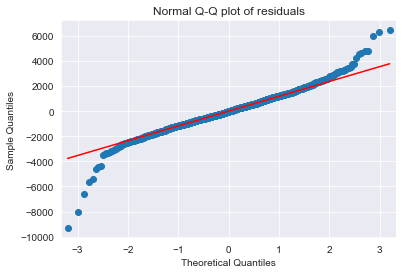

In [78]:
sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [79]:
list(np.where(model.resid>6000))  # outliar detection from above QQ plot of residuals


[array([109, 146, 522], dtype=int64)]

In [80]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

#### Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

In [81]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

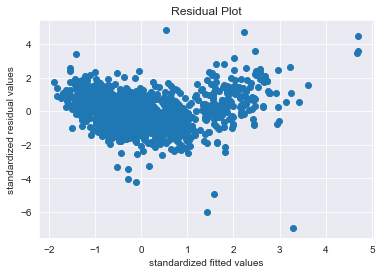

In [82]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

eval_env: 1


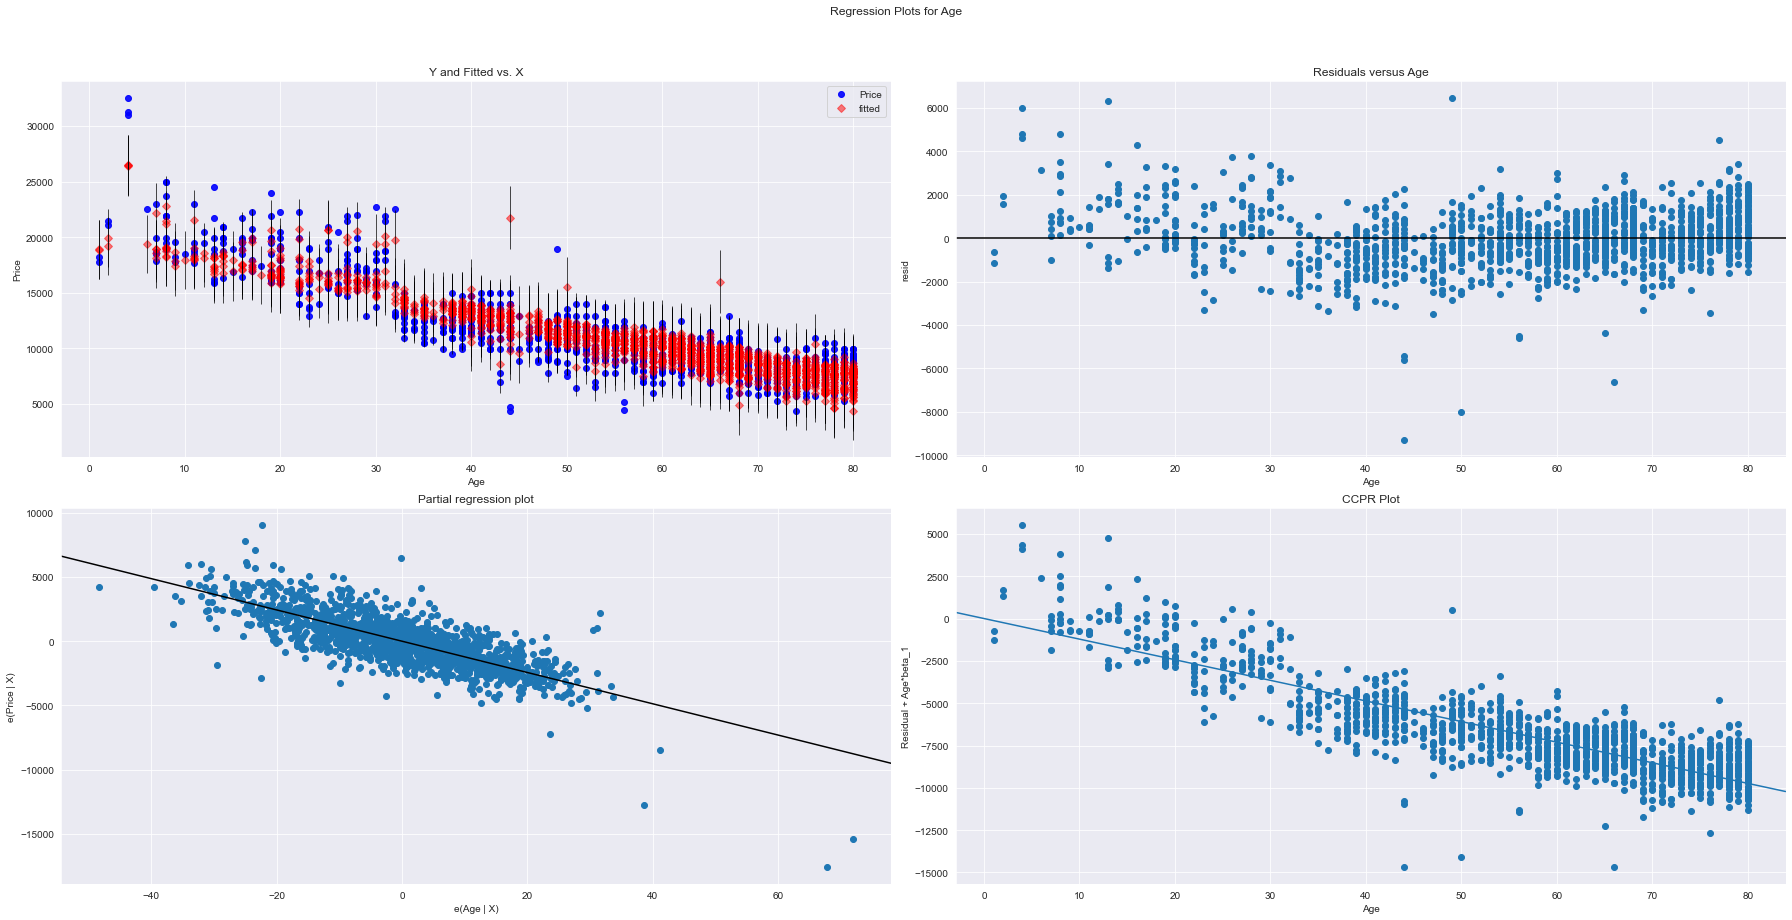

In [83]:
fig=plt.figure(figsize=(25,13))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


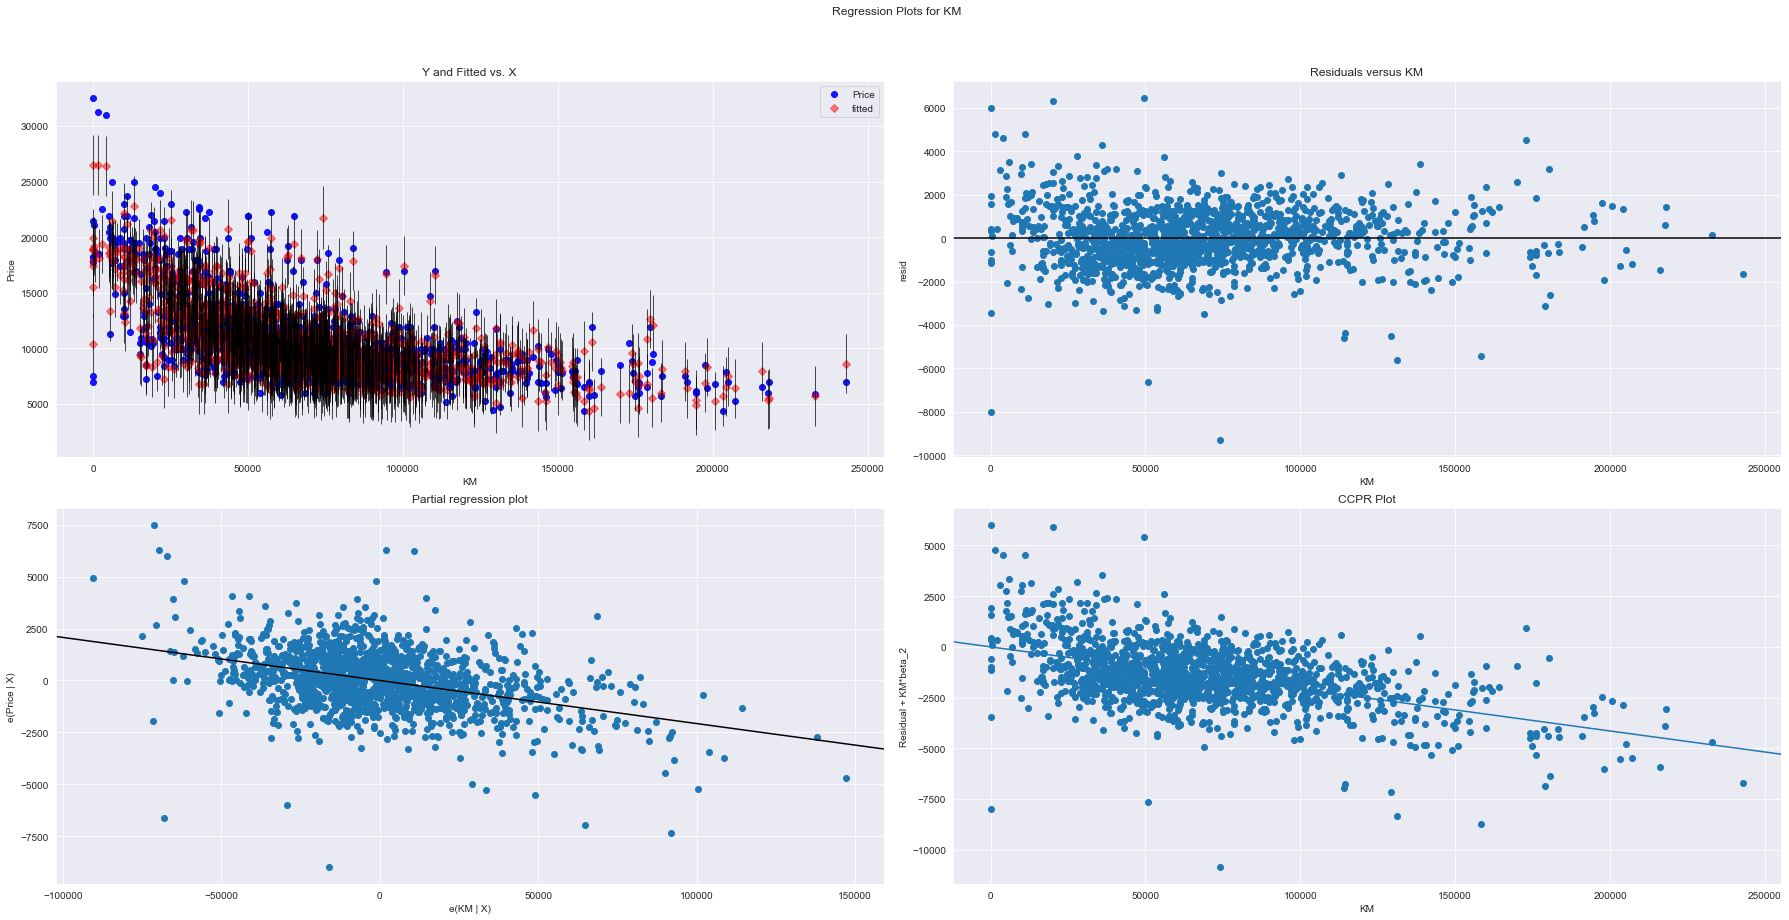

In [84]:
fig=plt.figure(figsize=(25,13))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


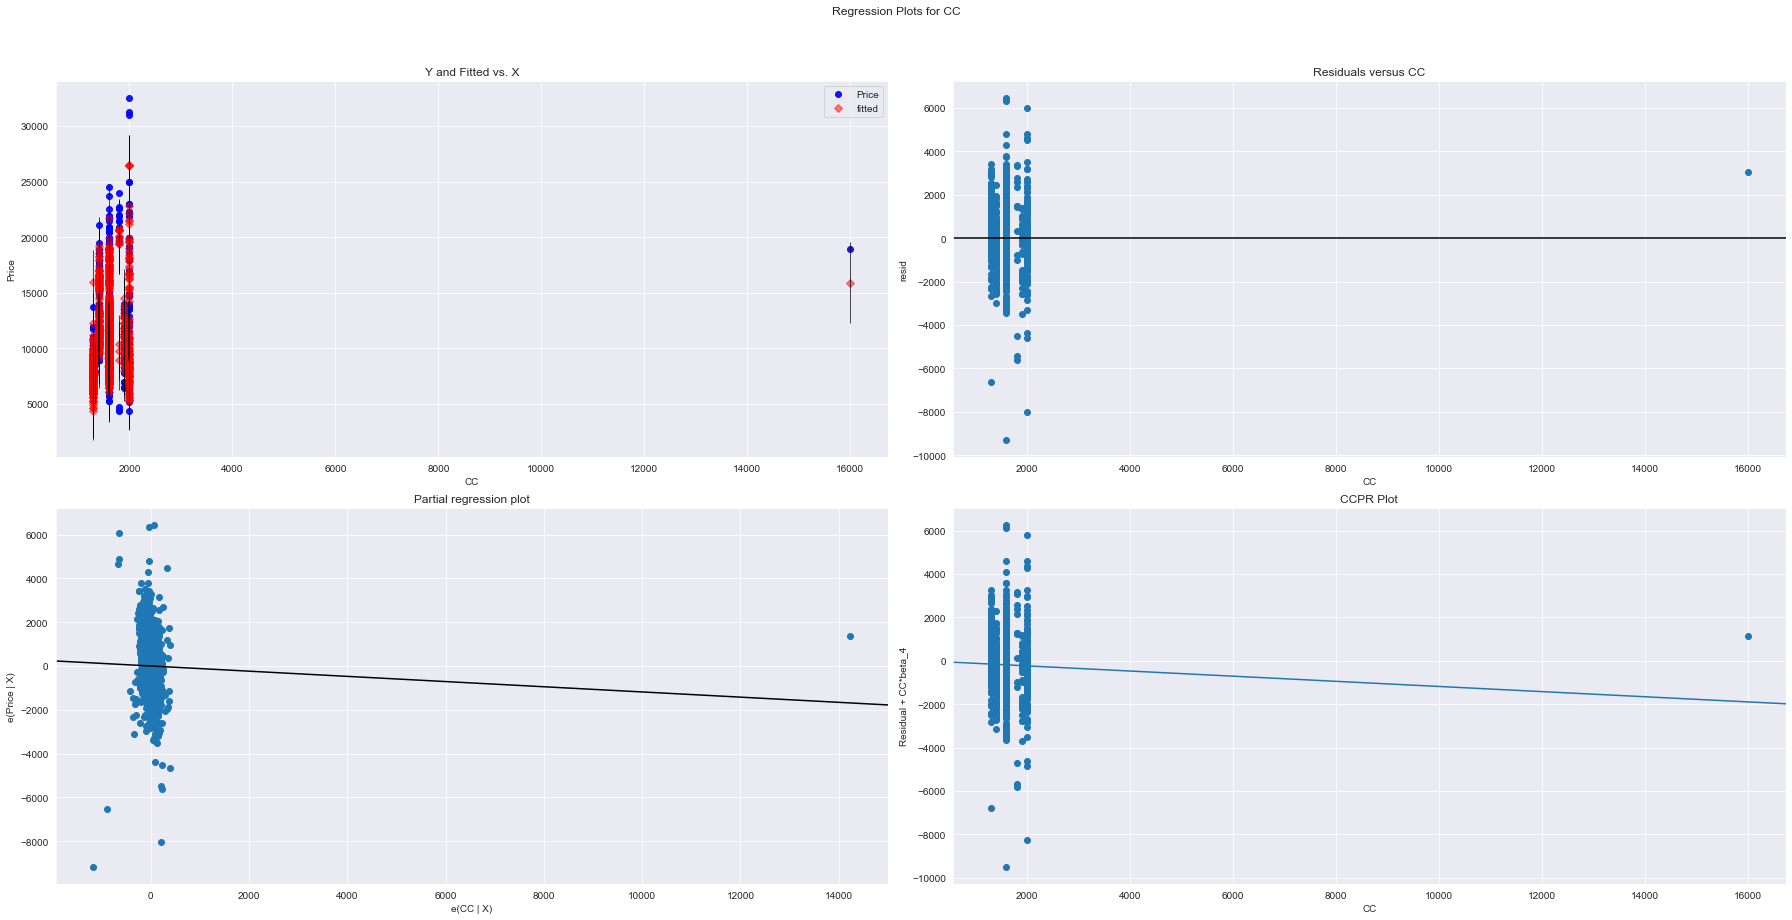

In [85]:
fig=plt.figure(figsize=(25,13))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

eval_env: 1


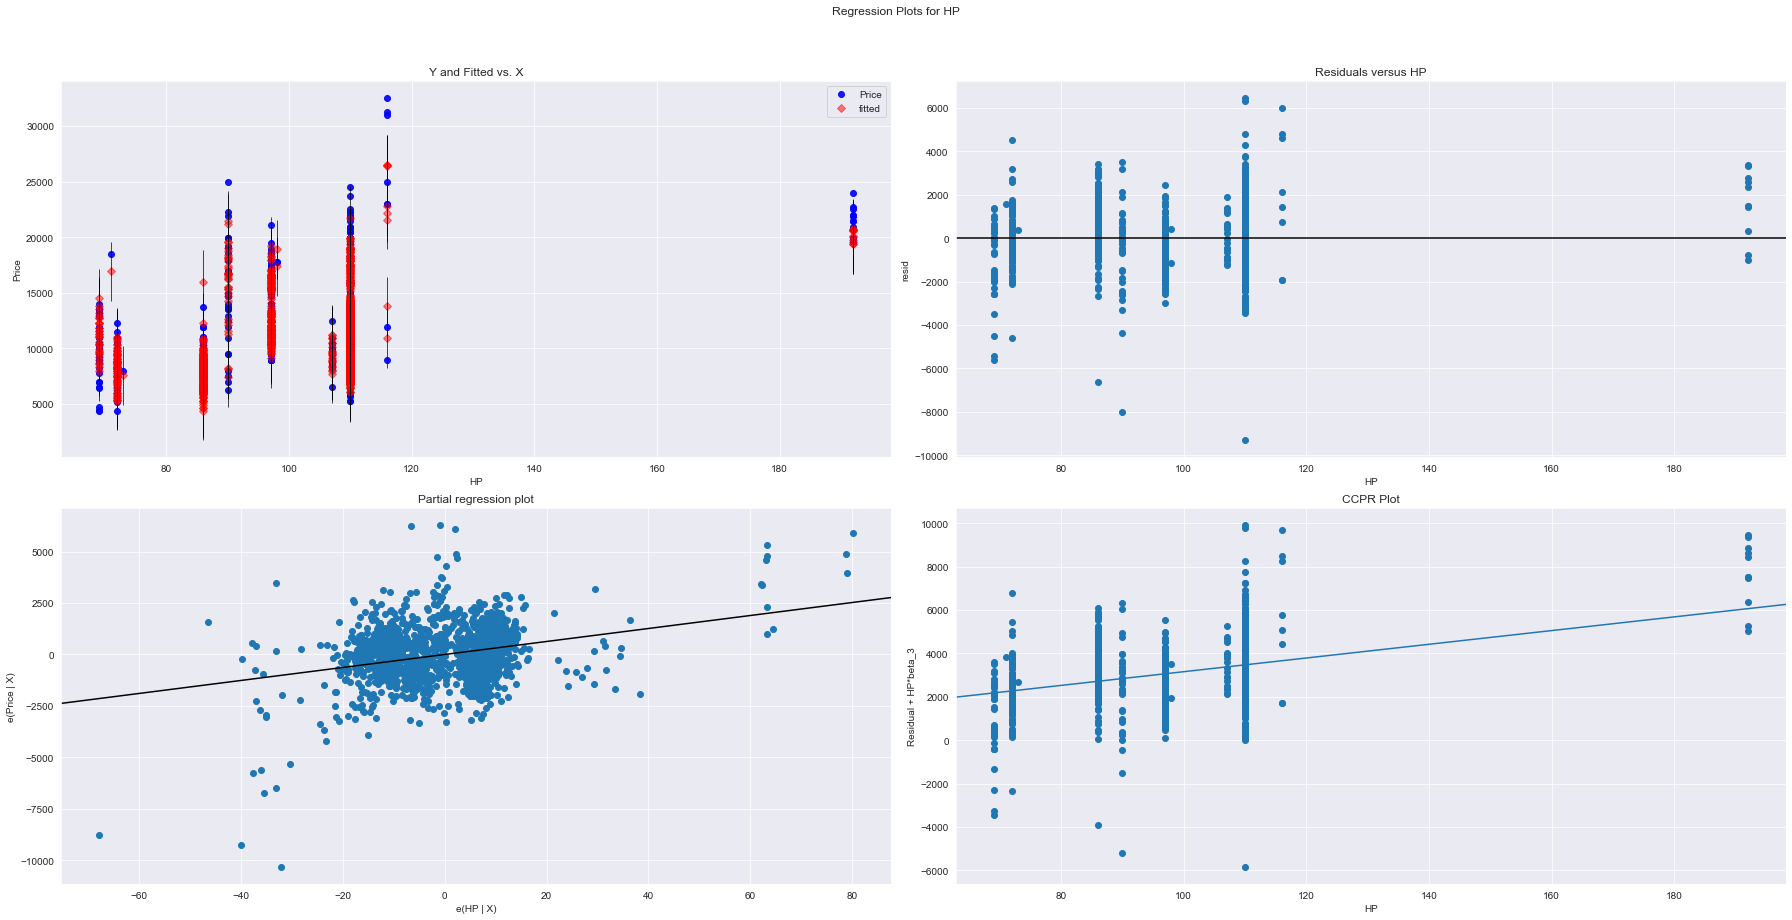

In [86]:
fig=plt.figure(figsize=(25,13))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


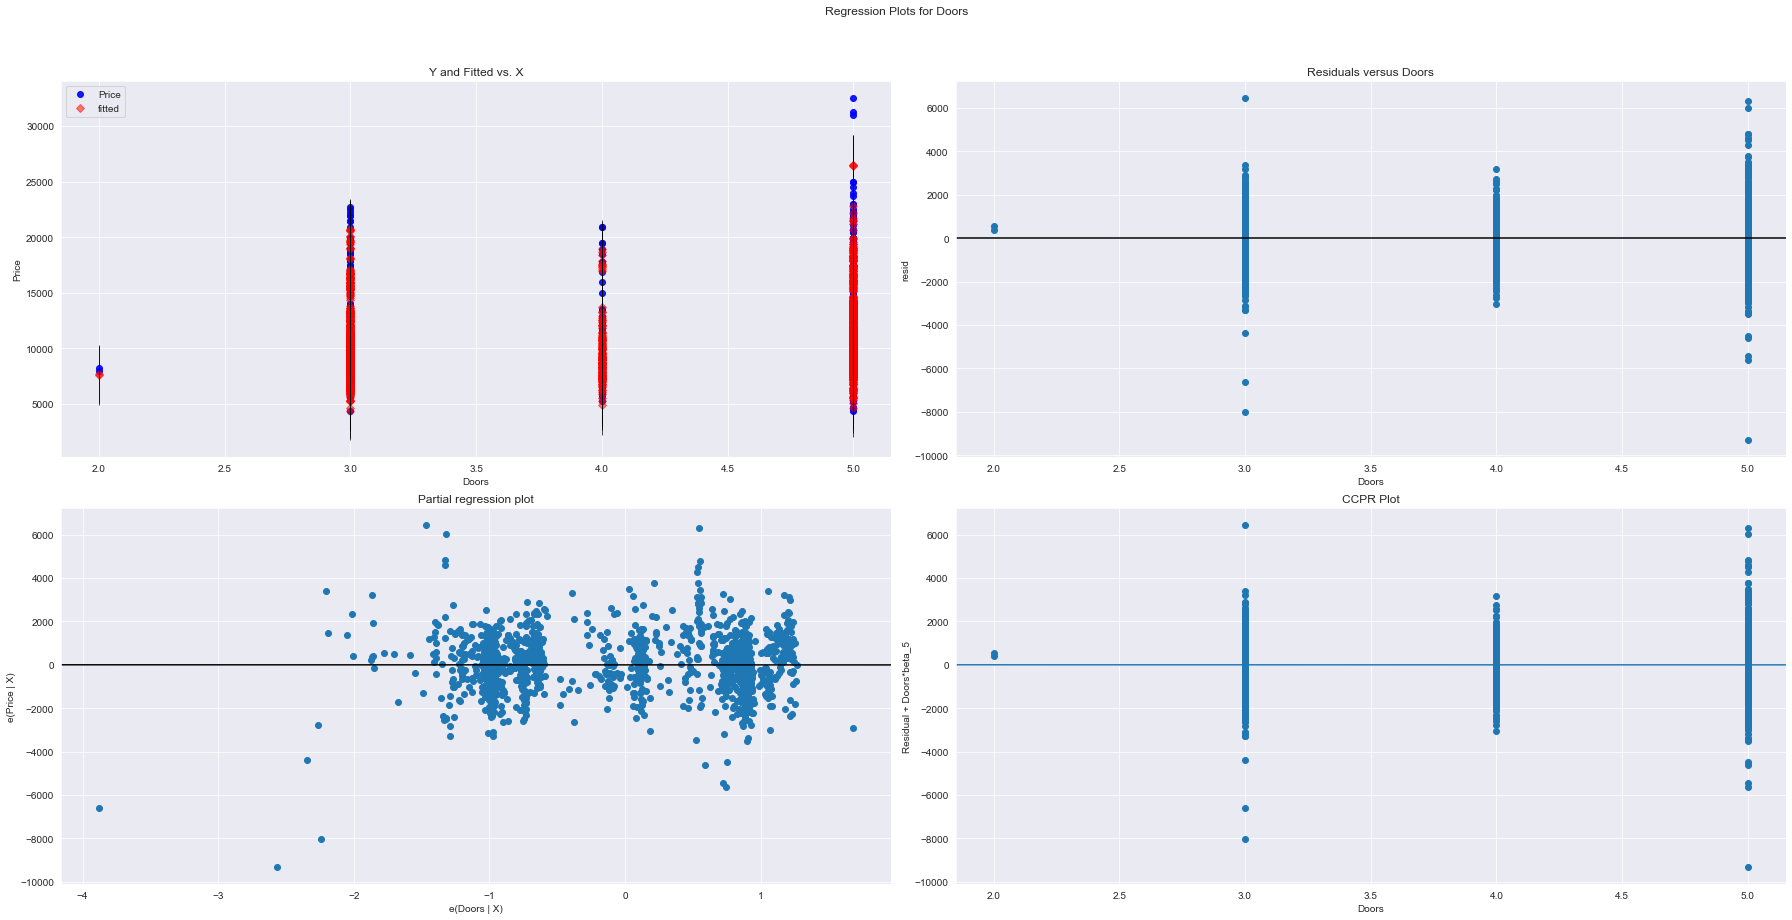

In [87]:
fig=plt.figure(figsize=(25,13))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


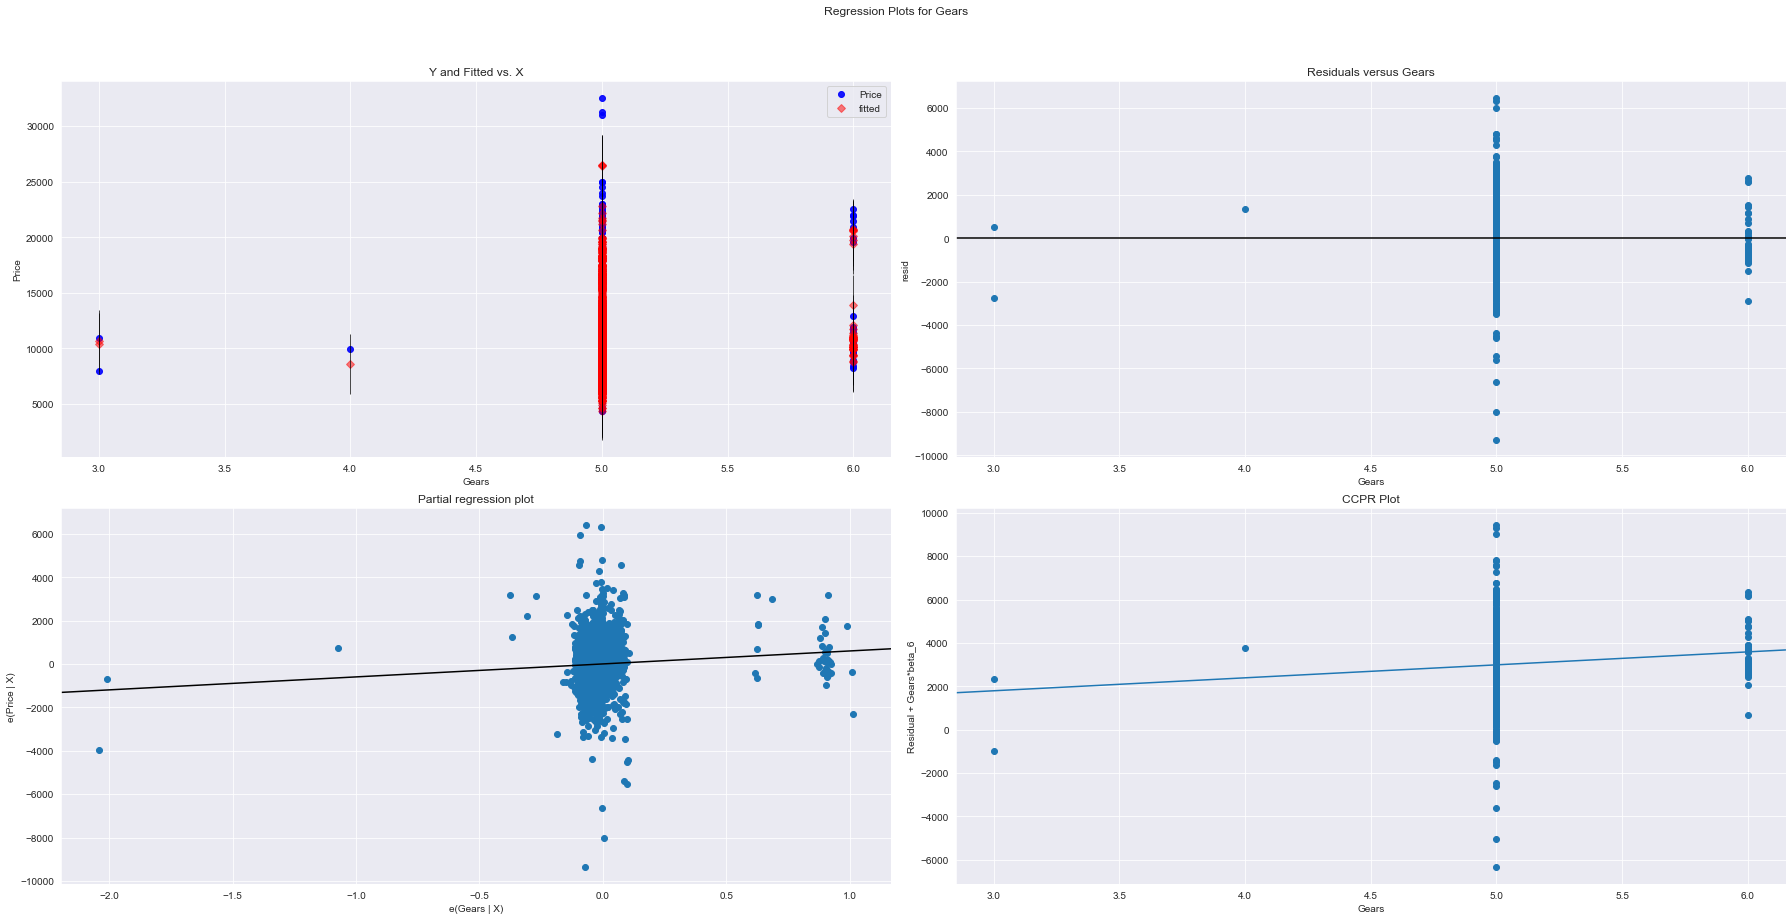

In [88]:
fig=plt.figure(figsize=(25,13))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


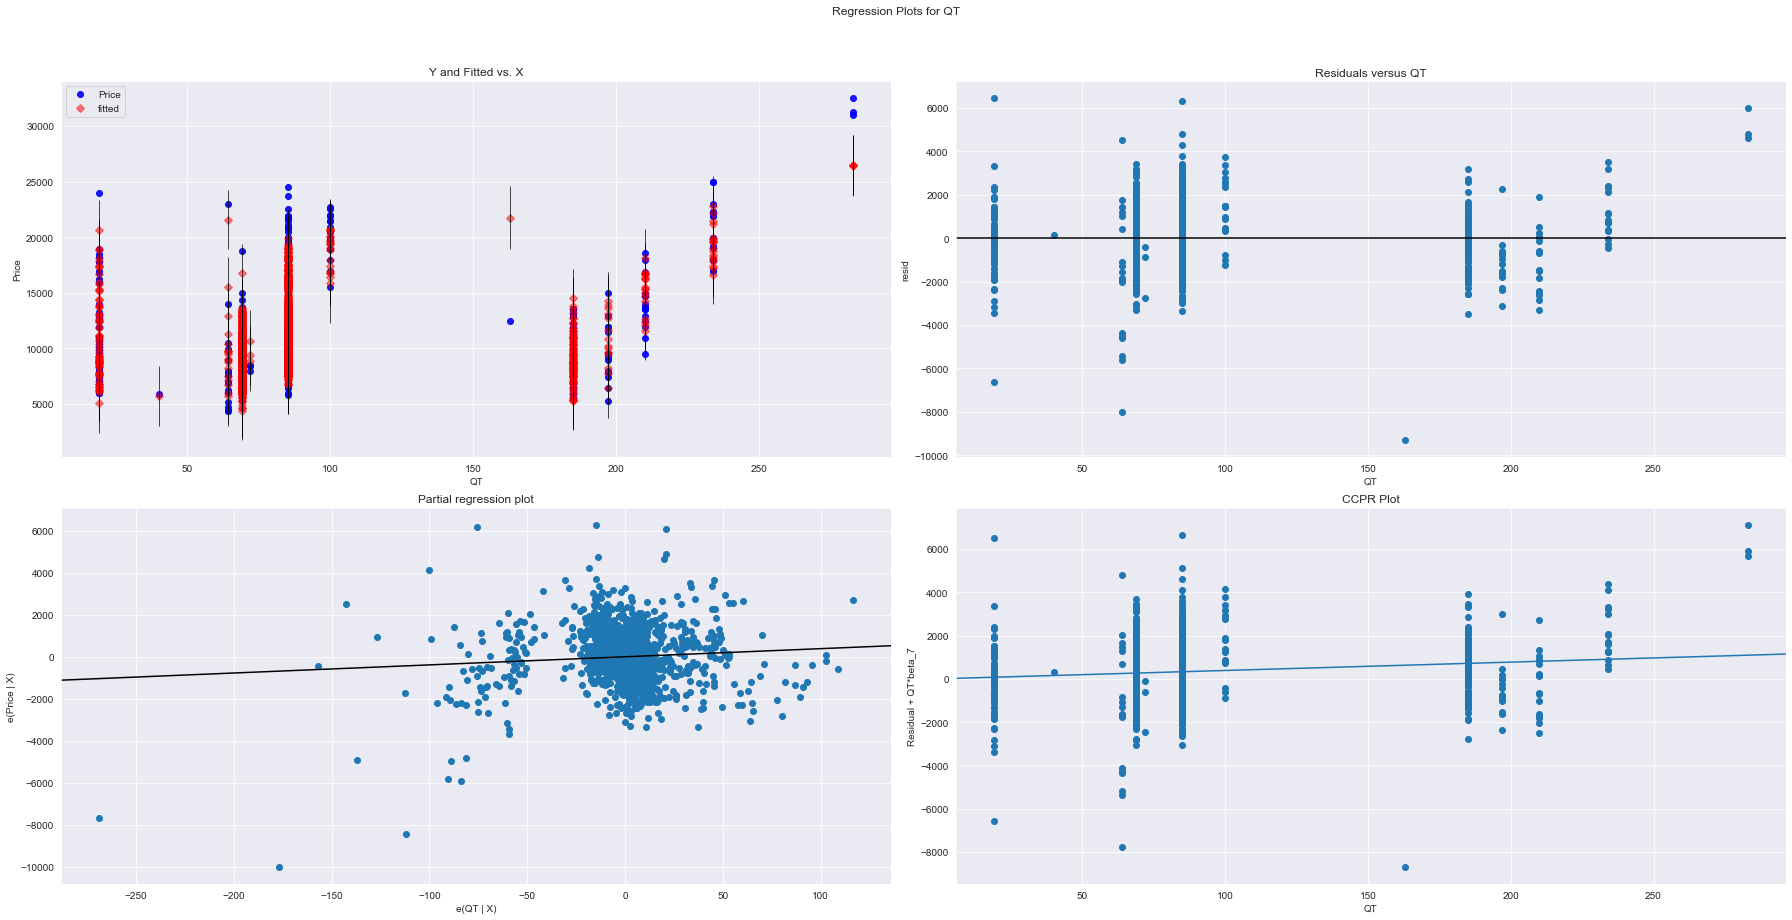

In [89]:
fig=plt.figure(figsize=(25,13))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

eval_env: 1


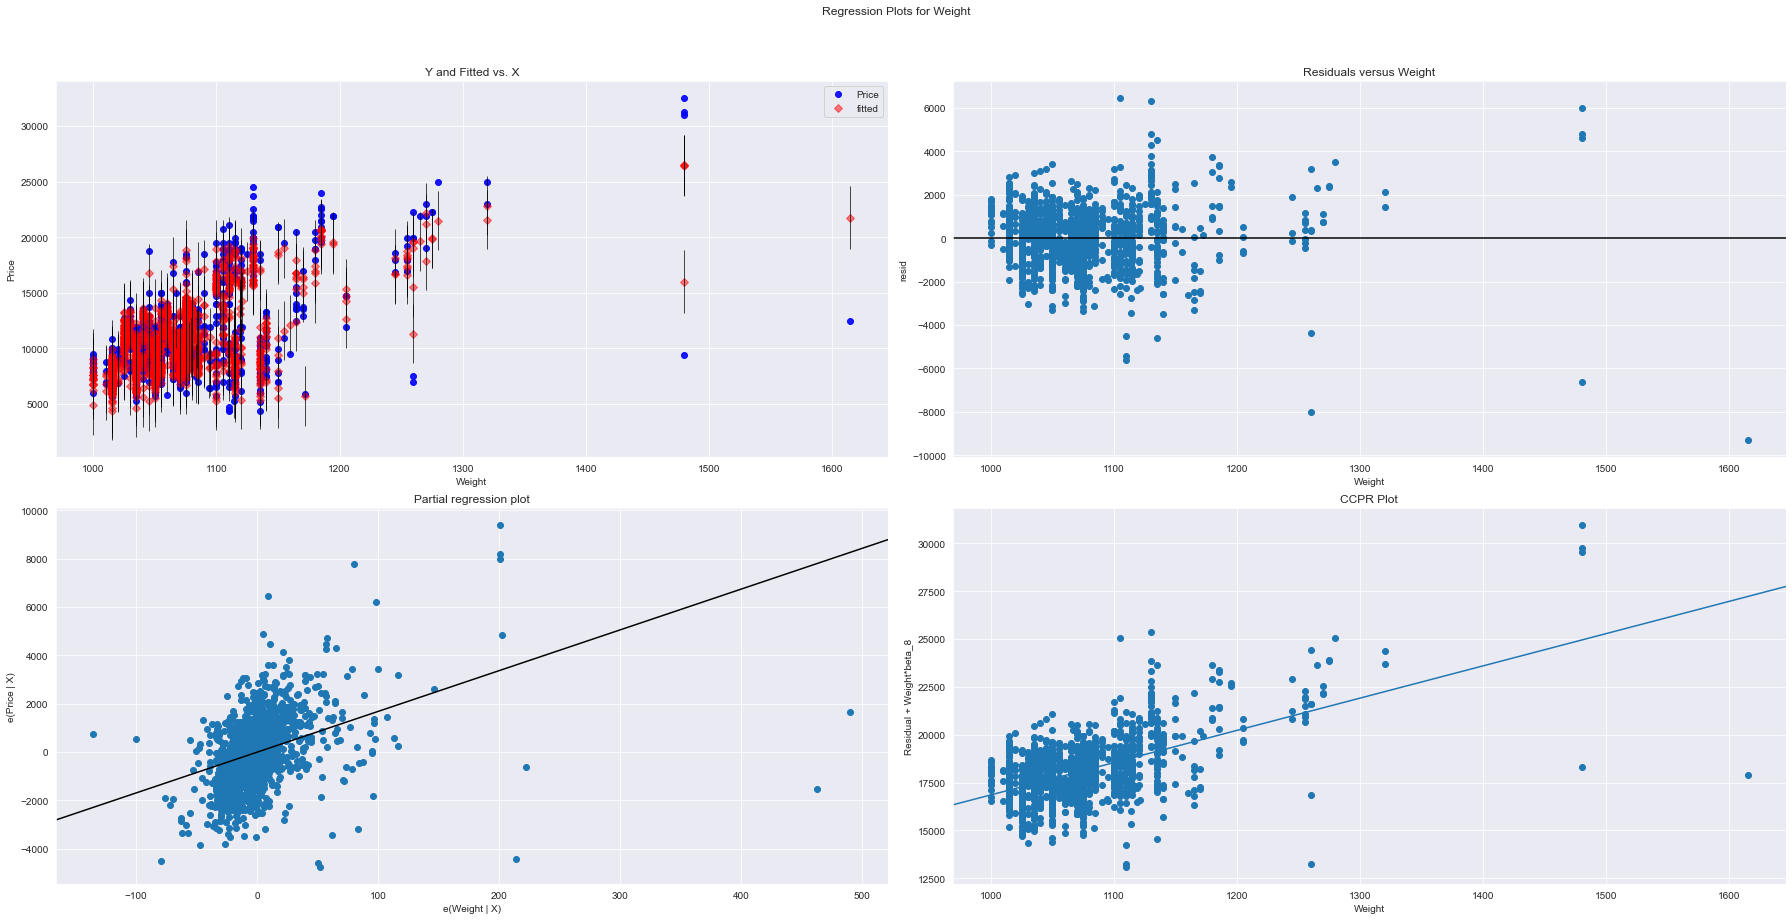

In [90]:
fig=plt.figure(figsize=(25,13))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# Model Deletion Diagnostics
## Checking outliers or influencers

## * Cook's Distance
## * Leverage Value`

#### If Cook's distance > 1, then it's an outlier
#### Get influencers using cook's distance

In [91]:
(c,_)=model.get_influence().cooks_distance
(c,_)

(array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
        8.04110550e-07, 6.99854767e-04, 1.08408002e-02]),
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99999998]))

####  Plot the influencers using the stem plot

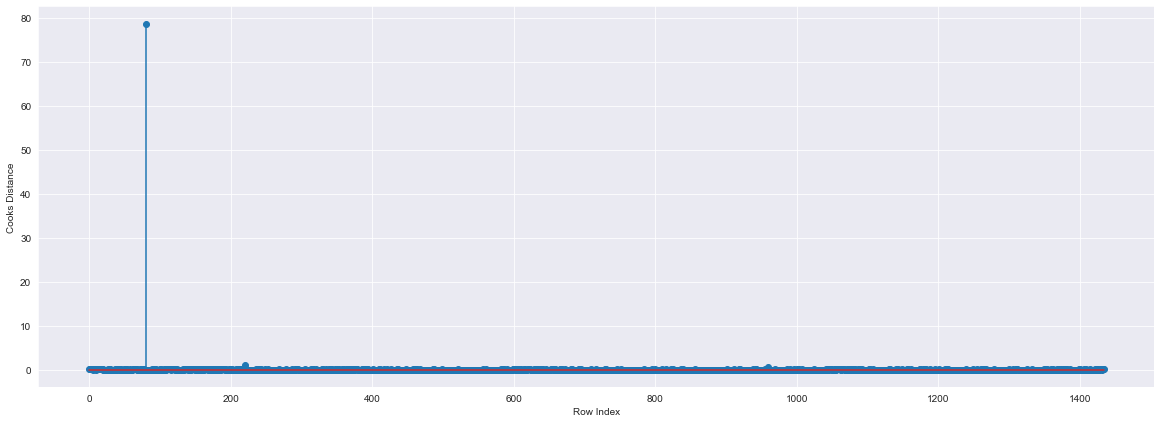

In [92]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota_3)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

#### Index and value of influencer where C>0.5

In [93]:
np.argmax(c) , np.max(c)

(80, 78.72950582248232)

#### Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers

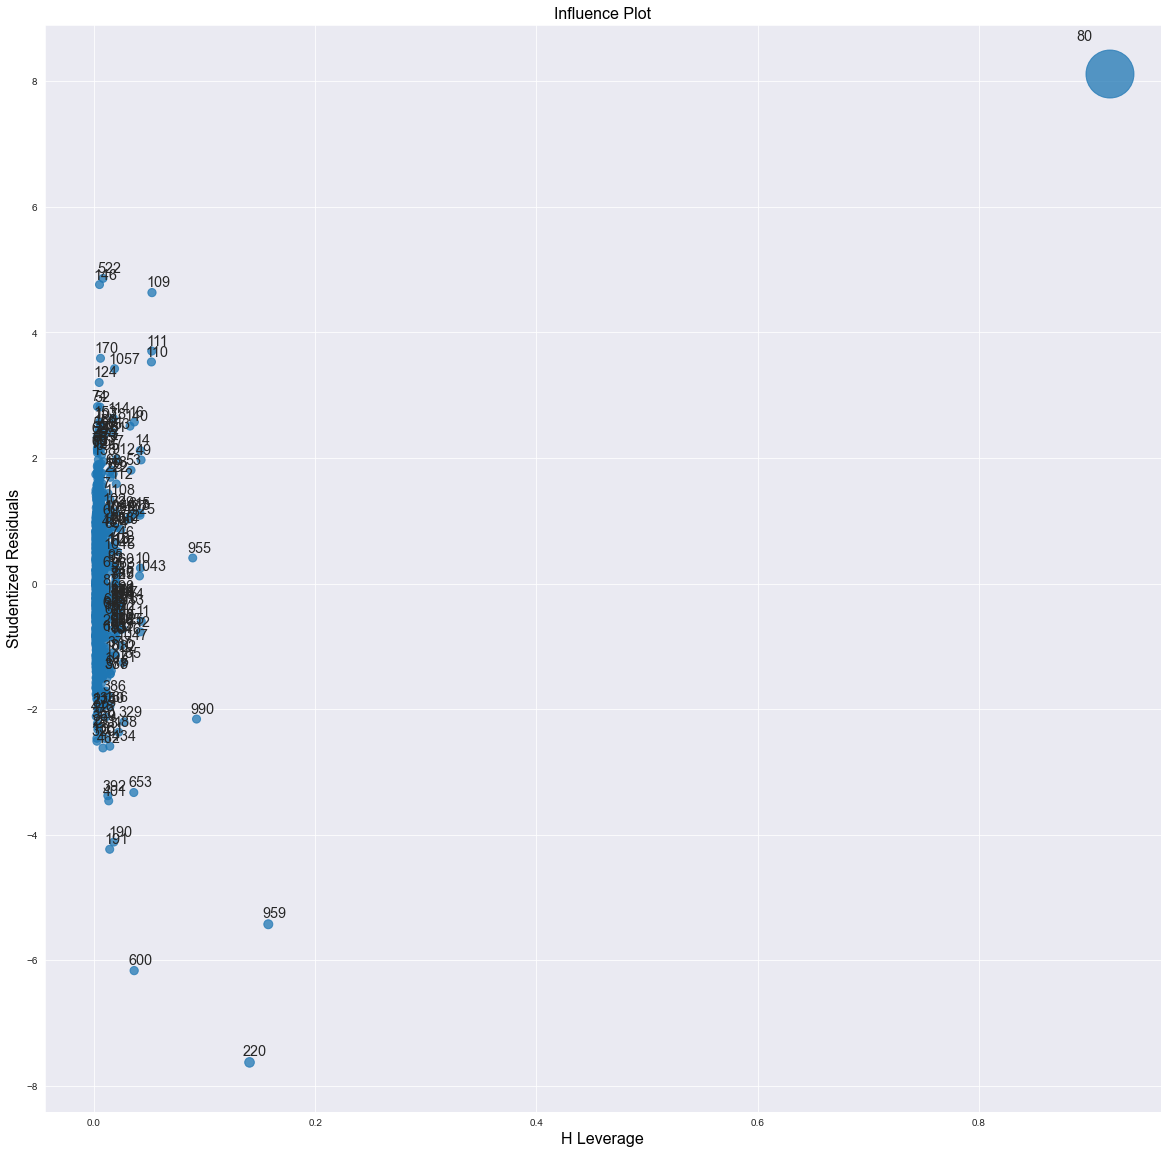

In [94]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

#### # Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

In [95]:
k=toyota_3.shape[1]
n=toyota_3.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [96]:
toyota_3[toyota_3.index.isin([80])] 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the Model

### Creating a copy of data so that original dataset is not affected

In [97]:
toyota_new=toyota_3.copy()
toyota_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


#### Discard the data points which are influencers and reassign the row number (reset_index(drop=True))

In [98]:
toyota_4=toyota_new.drop(toyota_new.index[[80]],axis=0).reset_index(drop=True)
toyota_4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


# Model Deletion Diagnostics And Final Model

In [99]:
while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_4).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyota_4=toyota_4.drop(toyota_4.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota_4
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_4).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)


Thus model accuracy is improved to 0.8882395145171204


In [100]:
final_model.rsquared

0.8882395145171204

In [101]:
toyota_4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


# Model Prediction

### say New data for prediction is

In [102]:

toyota_5=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
toyota_5

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


### Manual Prediction of Price


In [103]:
final_model.predict(toyota_5)

0    14341.570181
dtype: float64

In [104]:
pred_y=final_model.predict(toyota_4)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64